# Importing Libraries & EDA 

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from scipy.stats import norm
sns.set_style("dark")  # plotting style
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\DataScience\Datasets\Bank_Campaign.csv",sep=';', header=[0])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#stastical Summary
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Data Cleaning 

#removing Duplicate Values 

In [5]:
df.shape

(41188, 21)

In [6]:
df=df.drop_duplicates()
df.shape

(41176, 21)

In [7]:
#there are Unknown Values in other columns 
missing_cols=df.isin(['unknown']).sum(axis=0)
missing_cols

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribed           0
dtype: int64

In [8]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

# Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


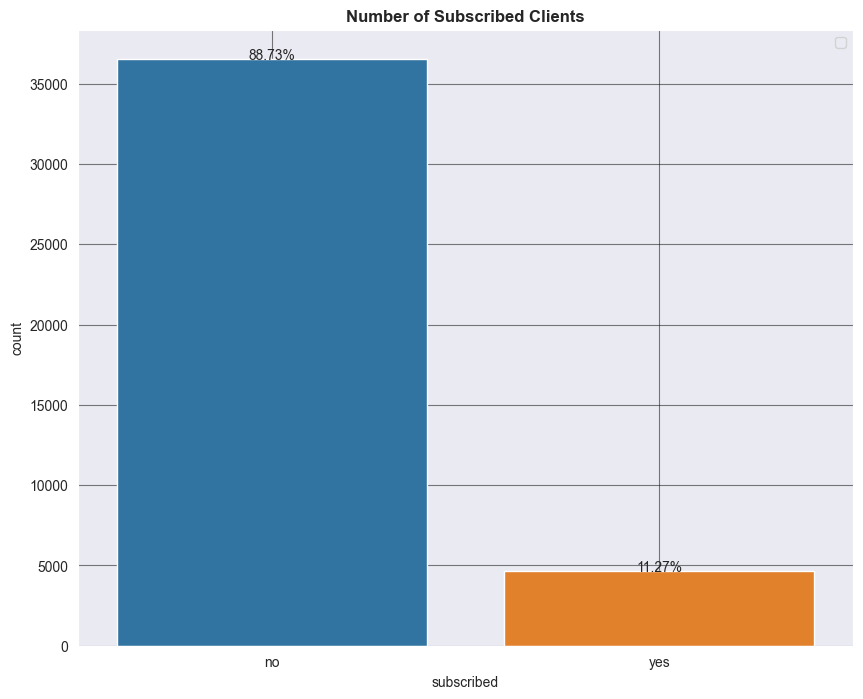

In [9]:
fig=plt.figure(figsize=(10,8))
plt.title("Number of Subscribed Clients",fontweight='bold')
ax=sns.countplot(x='subscribed',data=df)
size=float(df.shape[0])
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+4,'{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(True, alpha=0.5, color='black')
plt.legend(loc='best')
plt.show()

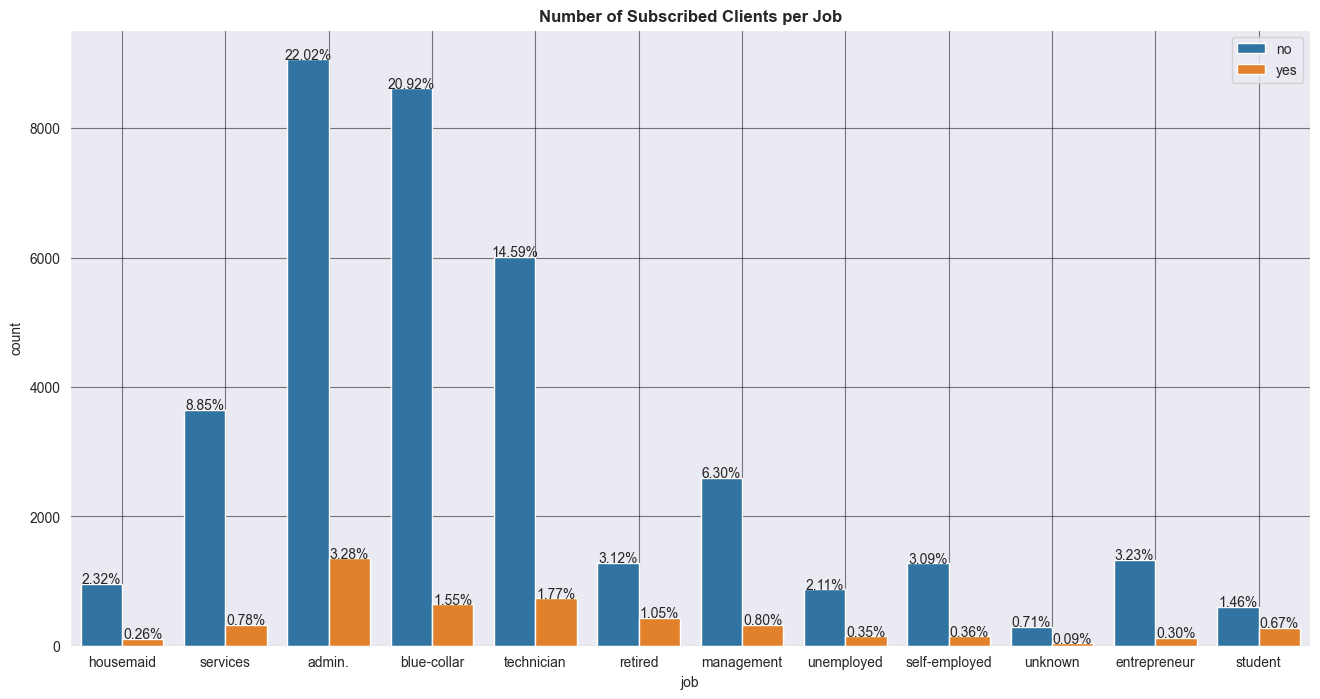

In [10]:
fig = plt.figure(figsize=(16,8)) 
plt.title('Number of Subscribed Clients per Job', fontweight='bold')
ax=sns.countplot(data=df, x='job', hue='subscribed')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(True, alpha=0.5, color='black')
plt.legend(loc='best')
plt.show()

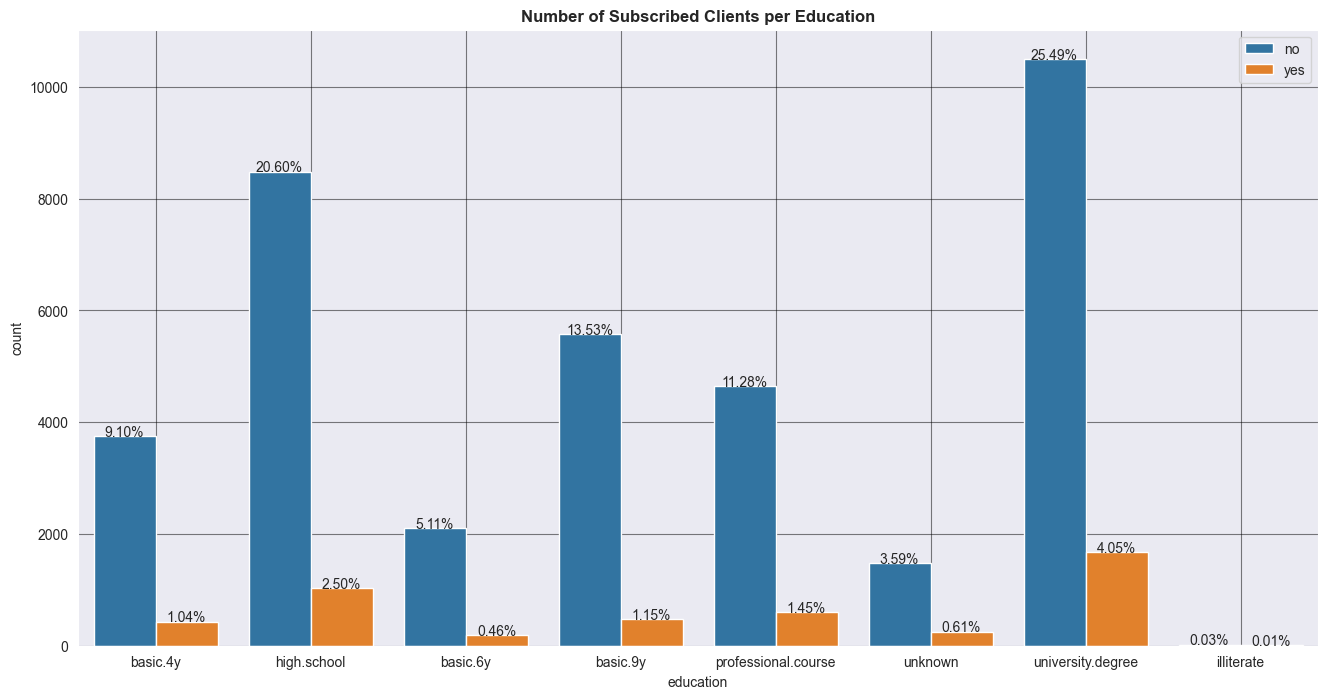

In [11]:
fig = plt.figure(figsize=(16,8)) 
plt.title('Number of Subscribed Clients per Education', fontweight='bold')
ax=sns.countplot(data=df, x='education', hue='subscribed')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(True, alpha=0.5, color='black')
plt.legend(loc='best')
plt.show()

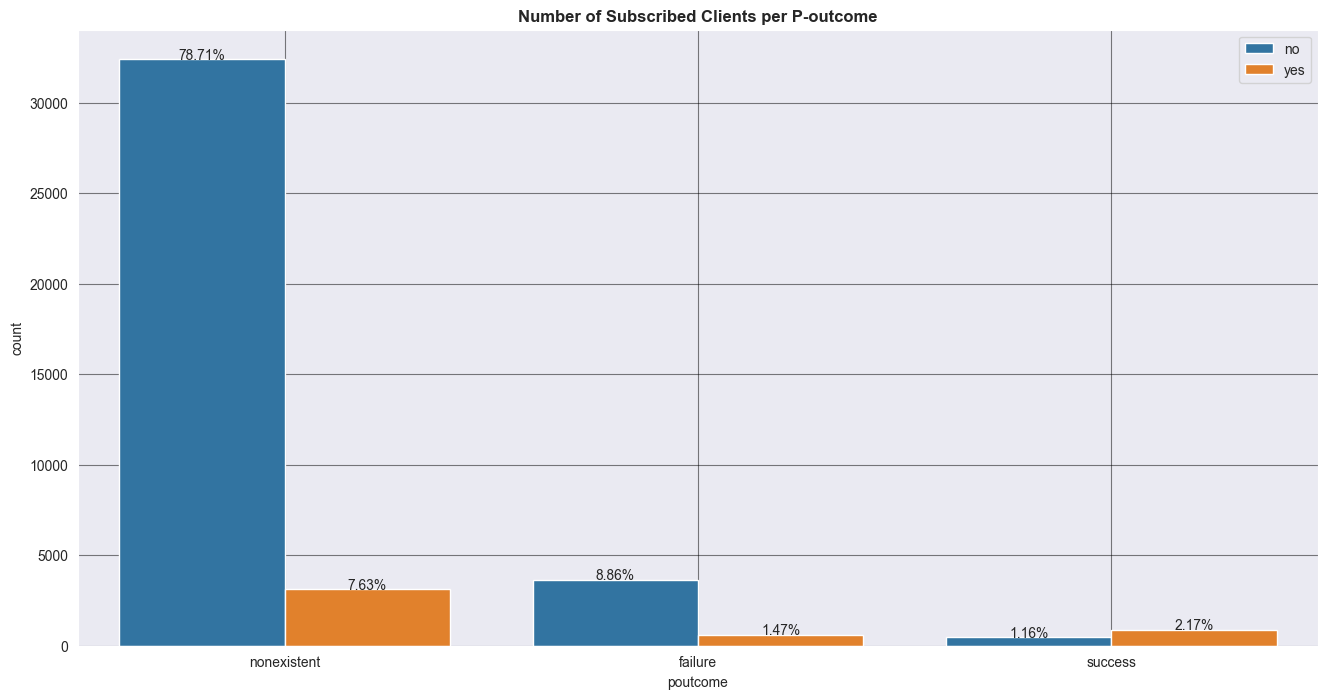

In [12]:
fig = plt.figure(figsize=(16,8)) 
plt.title('Number of Subscribed Clients per P-outcome', fontweight='bold')
ax=sns.countplot(data=df, x='poutcome', hue='subscribed')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(True, alpha=0.5, color='black')
plt.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Visualizing Multidimensional Relationships')

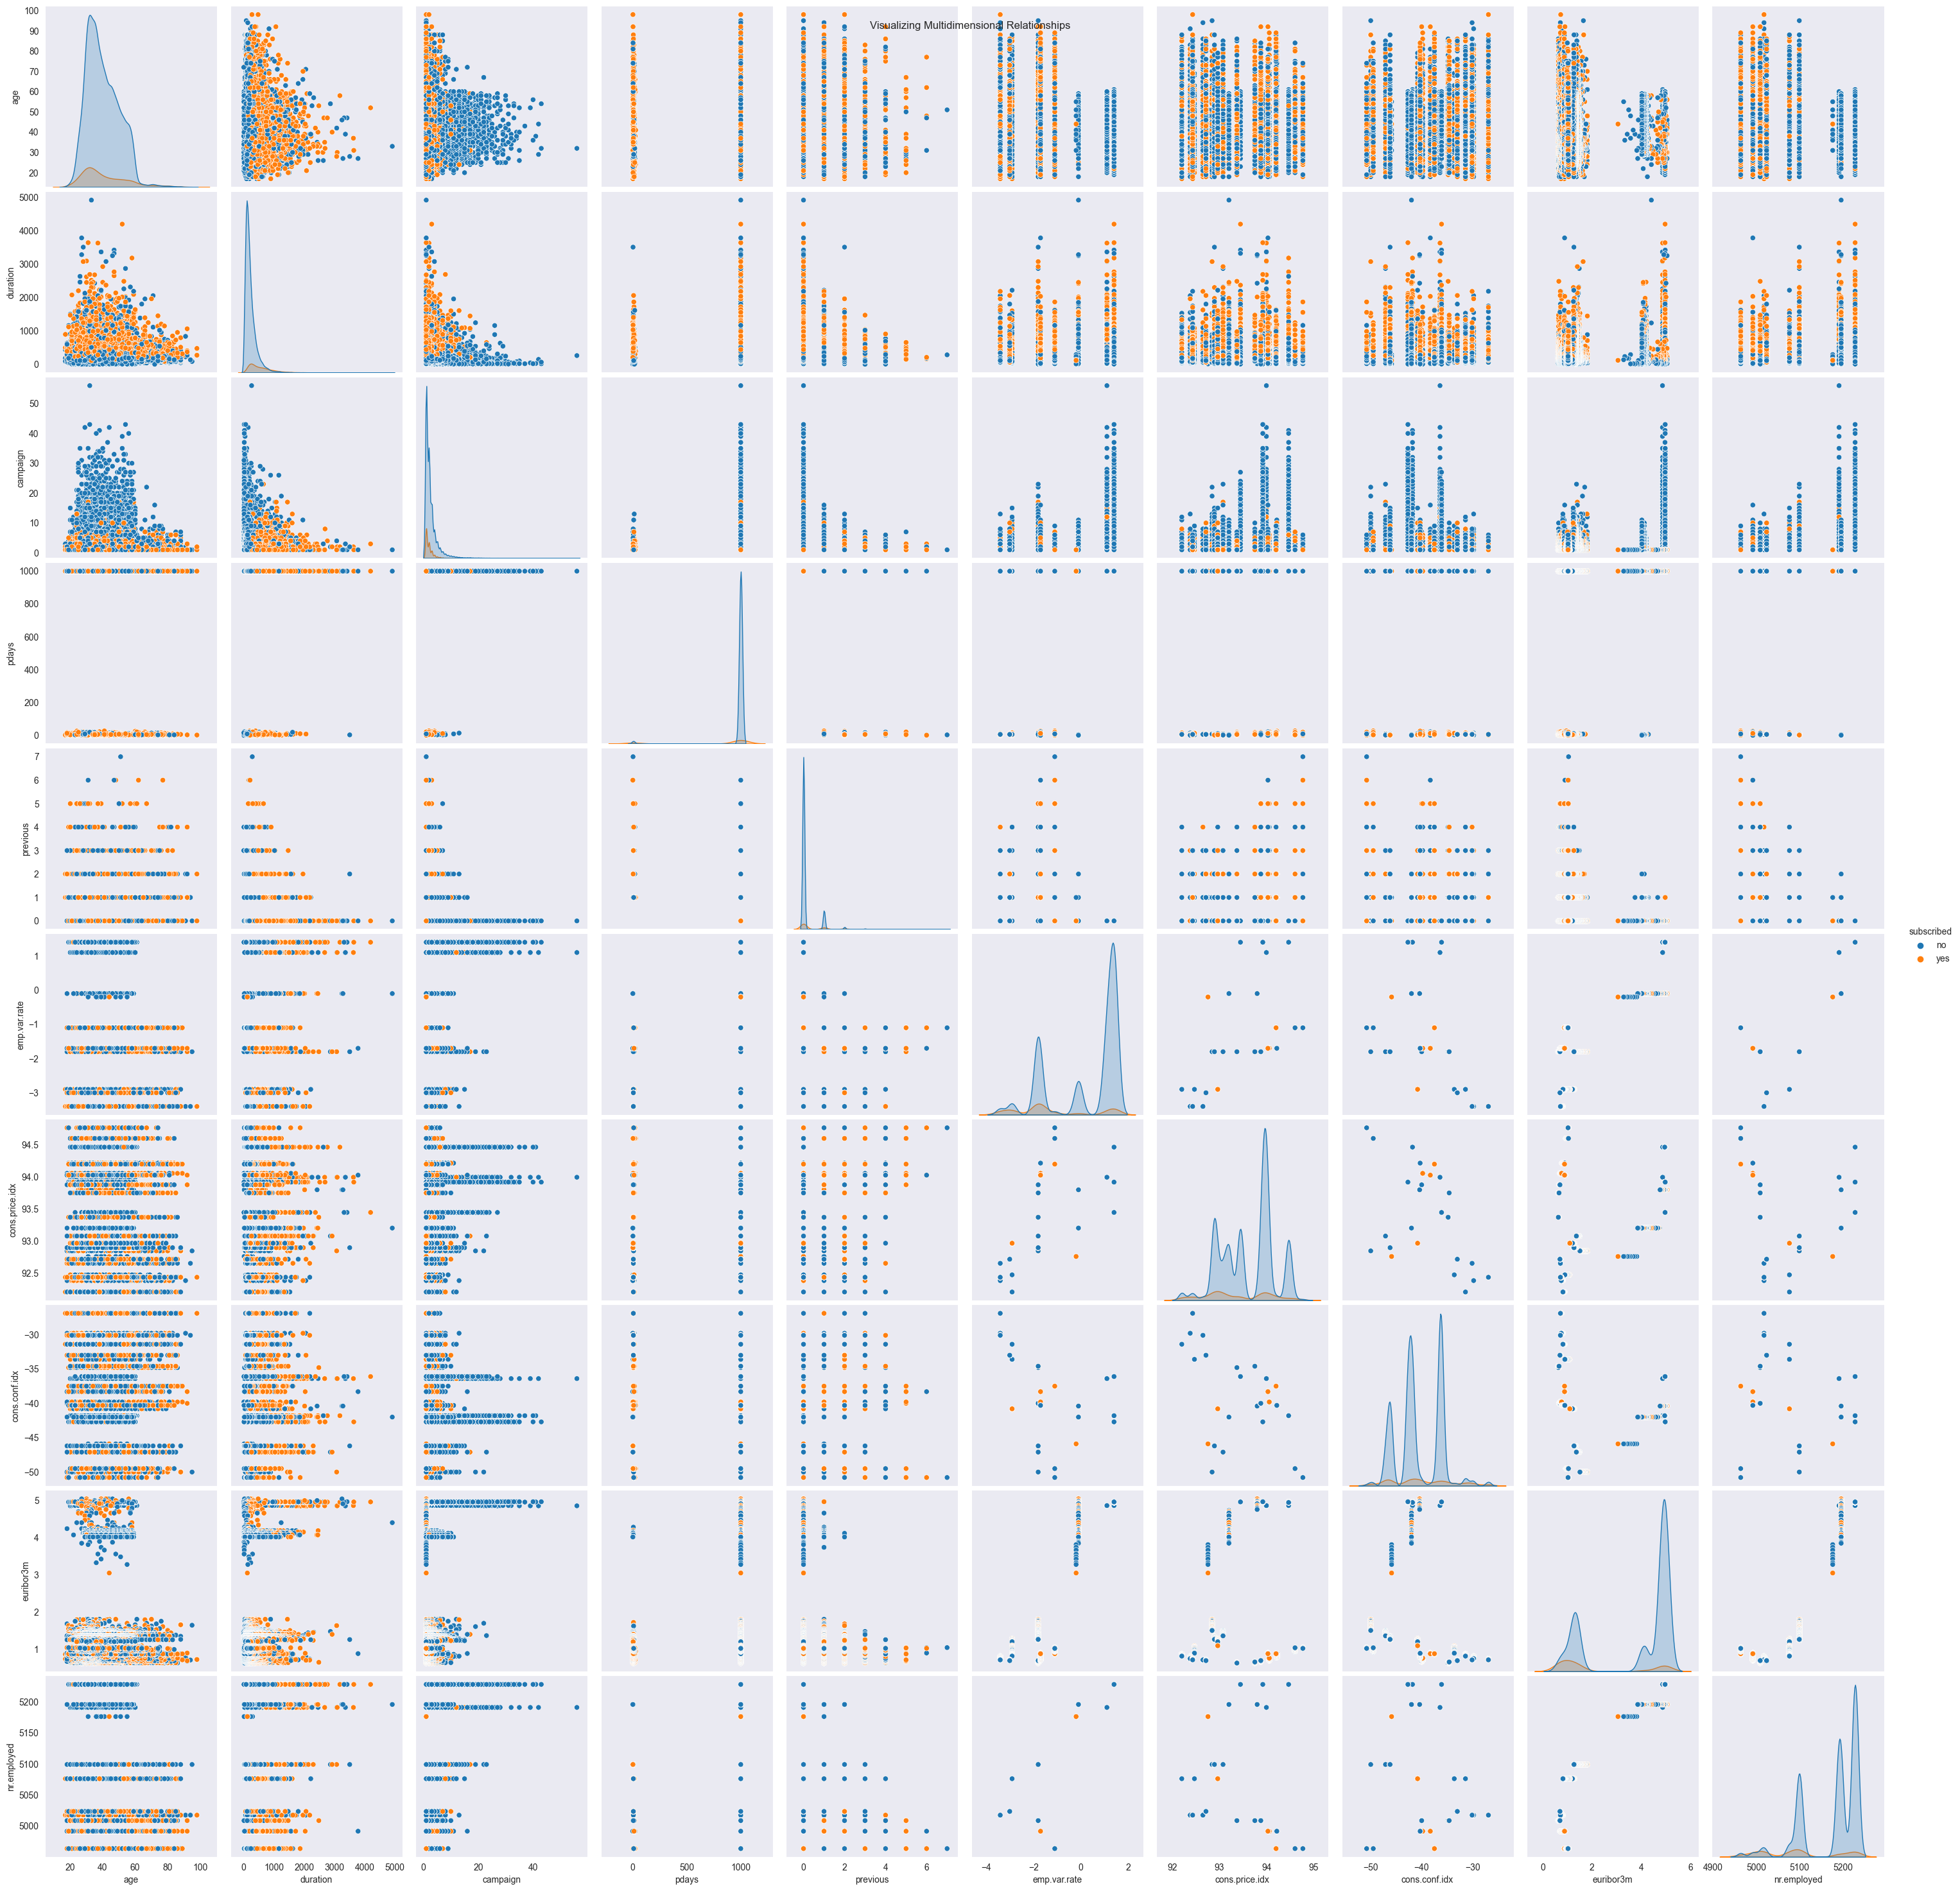

In [13]:
sns.pairplot(df, hue='subscribed', size=3);
plt.suptitle('Visualizing Multidimensional Relationships')

Text(0.5, 0.98, 'Correlation Matrix')

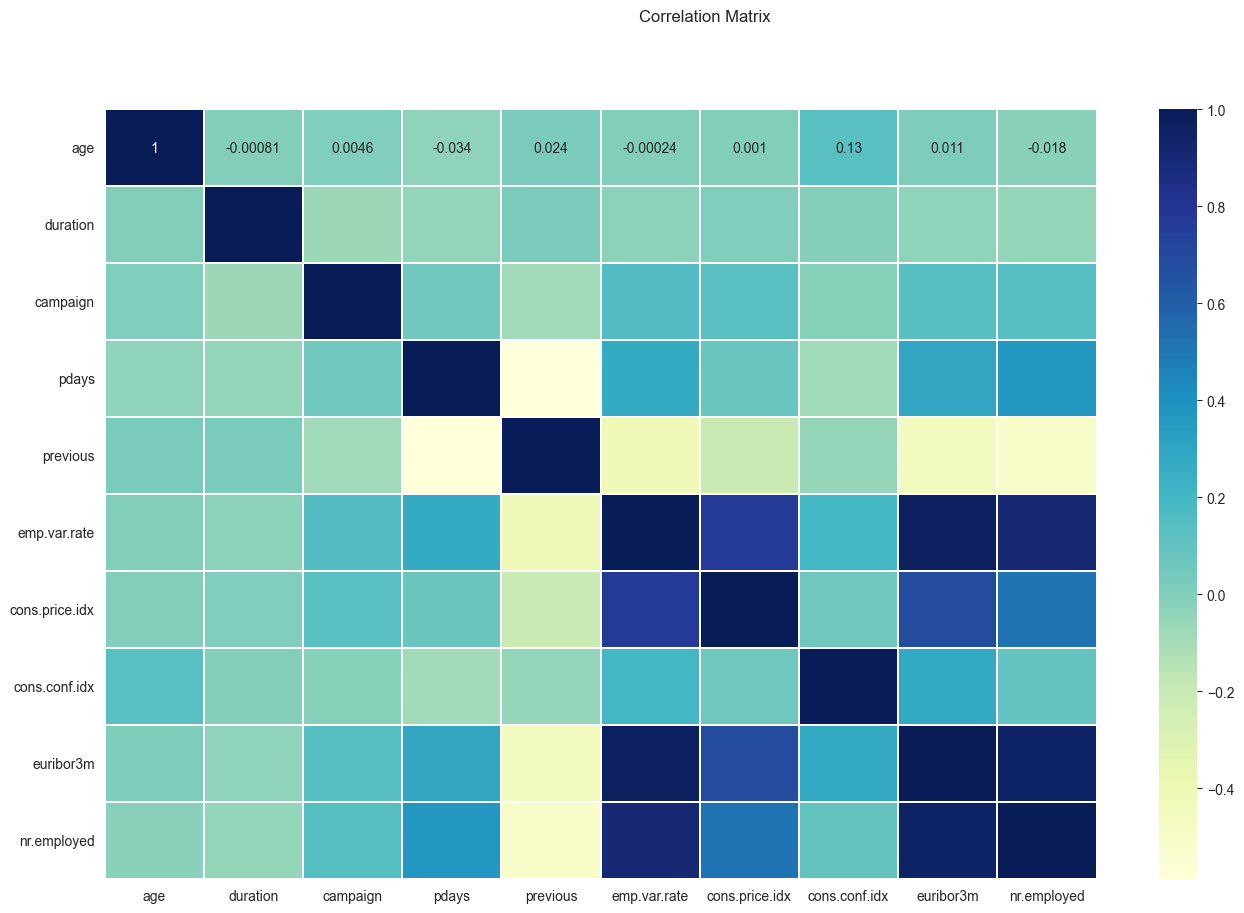

In [14]:
#create the correlation matrix heat map
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.suptitle('Correlation Matrix')

# Data Preprocessing 

In [15]:
# map the values from the target variable from 'yes' and 'no' to 1 and 0, as follows:
df.drop(columns=['pdays'], inplace=True)
# Transform the 'yes' and 'no' values (target variable) to 1 and 0 respectively
df['subscribed'] = df['subscribed'].map({'yes': 1, 'no': 0})

In [16]:
#the pre-processing part is to encode the categorical features of the dataset.
#we will use the one-hot encoding method
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [17]:
encoded_df = pd.concat([df, pd.get_dummies(df[categorical_cols])], axis=1)

In [18]:
encoded_df = encoded_df.drop(categorical_cols, axis=1)
encoded_df

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0


#Following the encoding of the categorical features, we will continue with the normalization (scalling) of the numerical features. For this we will use the MinMax scalling method.

In [19]:
# Scale
scaler = MinMaxScaler(feature_range=(0, 1))
encoded_scaled_df = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)

In [20]:
# Split the data to train and test sets
X = encoded_scaled_df.loc[:, encoded_scaled_df.columns != 'subscribed']
y = encoded_scaled_df['subscribed']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Evaluation Metrics 

In [22]:
#For model evaluation, let's define a function
def getModelEvaluationMetrics(classifier, model_name: str, x_test: pd.core.frame.DataFrame,
                              y_test: pd.core.frame.DataFrame, y_predicted, plot_confusion_matrix=False,
                              figsize=(10, 8)) -> np.ndarray:

    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n\n {0}'.format(conf_mat))
    
    if plot_confusion_matrix:
        labels = ['no', 'yes']
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
        cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('Expected')
        plt.title(f'Confusion Matrix for {model_name}', fontweight='bold')
        plt.show()
         # Calculating the precision (tp/tp+fp)
    precision = str(np.round((conf_mat[1][1] / (conf_mat[1][1] +
                              conf_mat[0][1])) * 100, 2))
    print('The precision is: {0} %'.format(precision))

    # Calculating the recall (tp/tp+fn)
    recall = str(np.round((conf_mat[1][1] / (conf_mat[1][1] +
                           conf_mat[1][0])) * 100, 2))
    print('The recall is: {0} %'.format(recall))

    return conf_mat

In [23]:
#To perform a full ROC analysis let's define a function
#ROC Curve and calculating of the ROC AUC score
def createROCAnalysis(classifier, model_name: str, y_test: pd.core.series.Series, pred_probs: np.ndarray,
                      plot_ROC_Curve=False, figsize=(10, 8)) -> int:
   
    if plot_ROC_Curve:
        plt.figure(figsize=figsize)
        plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier')
        fp_rate, tp_rate, _ = roc_curve(y_test, pred_probs[:, 1])
        plt.plot(fp_rate, tp_rate, marker='.', label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}', fontweight='bold')
        plt.grid(True, alpha=0.1, color='black')
        plt.legend(loc='lower right')
        plt.show()

    # Calculate Area Under Curve (AUC) for the Receiver Operating
    # Characteristics Curve (ROC)
    auc_score = np.round(roc_auc_score(y_test, pred_probs[:, 1]), 4)
    print(f'{model_name} - ROC AUC score: {auc_score}')
    return auc_score

# Apply Classification Model

In [24]:
# Instantiate the Random Forest model
# Instantiate the Random Forest model
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                              max_depth=None, max_features=10, max_leaf_nodes=None,
                              min_impurity_decrease=0.0,
                              min_samples_leaf=20, min_samples_split=20)


In [25]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
#Fit the model 
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=10, min_samples_leaf=20,
                       min_samples_split=20)

In [27]:
rfc_y_pred = rfc.predict(X_test)

Confusion matrix:

 [[7116  149]
 [ 588  383]]


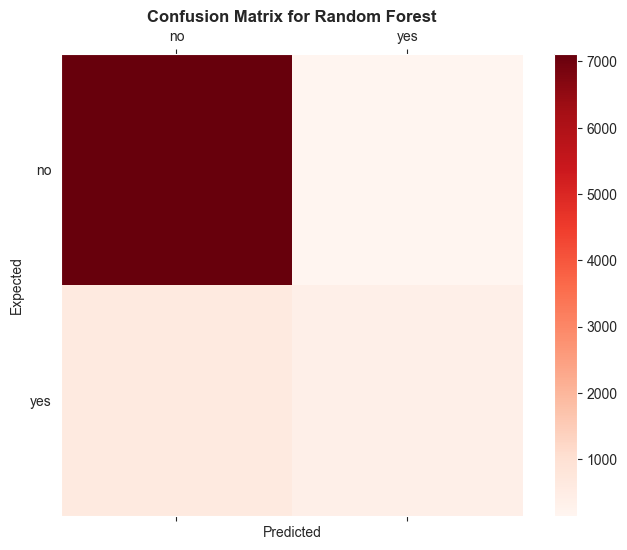

The precision is: 71.99 %
The recall is: 39.44 %


array([[7116,  149],
       [ 588,  383]], dtype=int64)

In [28]:
# Evaluate the model by using Recall/Precission:
getModelEvaluationMetrics(classifier=rfc, model_name='Random Forest',x_test=X_test, y_test=y_test,
                              y_predicted=rfc_y_pred, plot_confusion_matrix=True, figsize=(8,6))

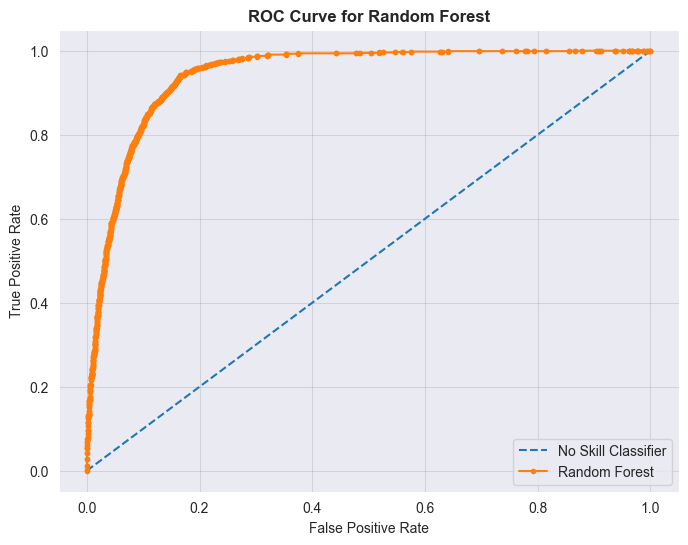

Random Forest - ROC AUC score: 0.9434


0.9434

In [29]:
# Evaluate the model by using ROC Curve:
rfc_pred_probs = rfc.predict_proba(X_test)
createROCAnalysis(classifier=rfc, model_name='Random Forest', y_test=y_test, pred_probs=rfc_pred_probs,
                  plot_ROC_Curve=True, figsize=(8,6))

 #the model shows very good at predicting clients who are not going to subscribe (negative class) But did not perform very well in the case of the positive class, as it classified correctly approximately 39% of the total clients who end up subscribing for the product.

here i will try apply xgboost classifire 
 Let see whether my model can perform better in the case of the positive class or not??

# XGBoost

In [30]:
import xgboost as xgb

In [31]:
 xgbc=xgb.XGBClassifier(learning_rate = 0.01, max_depth = 10, min_child_weight = 2, subsample = 0.5, colsample_bytree = 0.7,
                   n_estimators = 1000)

In [32]:
xgbc.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.01,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': 2,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 1000,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.5,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [33]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
xgbc_y_pred = xgbc.predict(X_test)

Confusion matrix:

 [[7015  250]
 [ 454  517]]


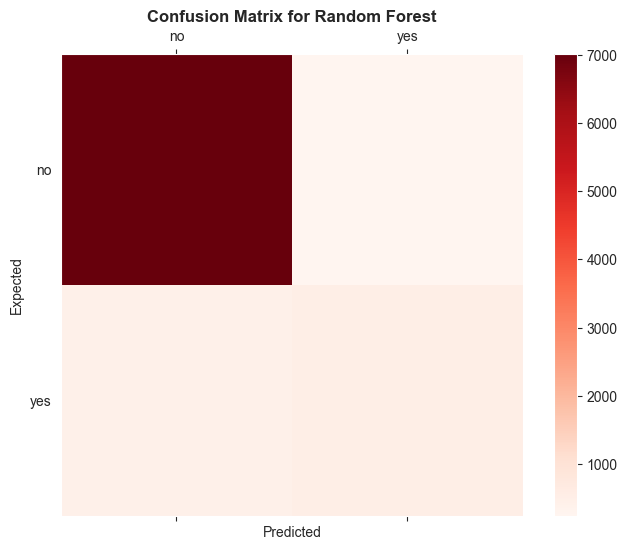

The precision is: 67.41 %
The recall is: 53.24 %


array([[7015,  250],
       [ 454,  517]], dtype=int64)

In [35]:
# Evaluate the model by using Recall/Precission:
getModelEvaluationMetrics(classifier=xgbc, model_name='Random Forest',x_test=X_test, y_test=y_test,
                              y_predicted=xgbc_y_pred, plot_confusion_matrix=True, figsize=(8,6))

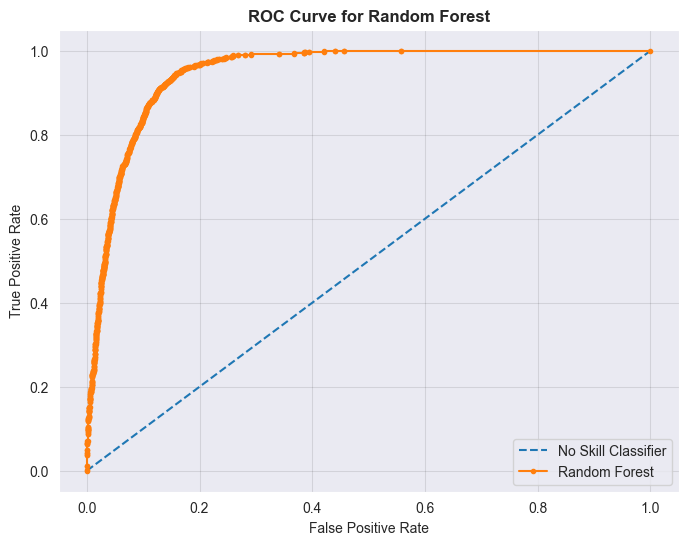

Random Forest - ROC AUC score: 0.9482


0.9482

In [36]:
xgbc_predict_probs = xgbc.predict_proba(X_test)
createROCAnalysis(classifier=xgbc, model_name='Random Forest', y_test=y_test, pred_probs=xgbc_predict_probs,
                  plot_ROC_Curve=True, figsize=(8,6))

# Previous model [Random Forest Classifire] = subscription(yes)- 42%

# Proposed model [XGboost Classifire] = subscription(yes)- 53%

# Applying PCA 

 reduction of noise in the data, feature selection (to a certain extent), and the ability to produce independent, uncorrelated features of the data

In [37]:
# Find the feature importance based on Gini criterion
#Initialize an empty dictionary for feature importance:
feature_importance = {}

In [38]:
#Extract feature importances from the random forest classifier:
best_estimator_fi = rfc.feature_importances_

In [39]:
#Iterate over features and their importance scores:
for feature, importance in zip(X_train.columns, best_estimator_fi):
    feature_importance[feature] = importance

In [40]:
#Convert dictionary to DataFrame:
importances = pd.DataFrame.from_dict(feature_importance, orient='index').rename(columns={0: 'Gini Score'})

In [41]:
#Sort the DataFrame by importance scores:
importances = importances.sort_values(by='Gini Score', ascending=False)

In [42]:
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.
#It is also known as the Gini importance.

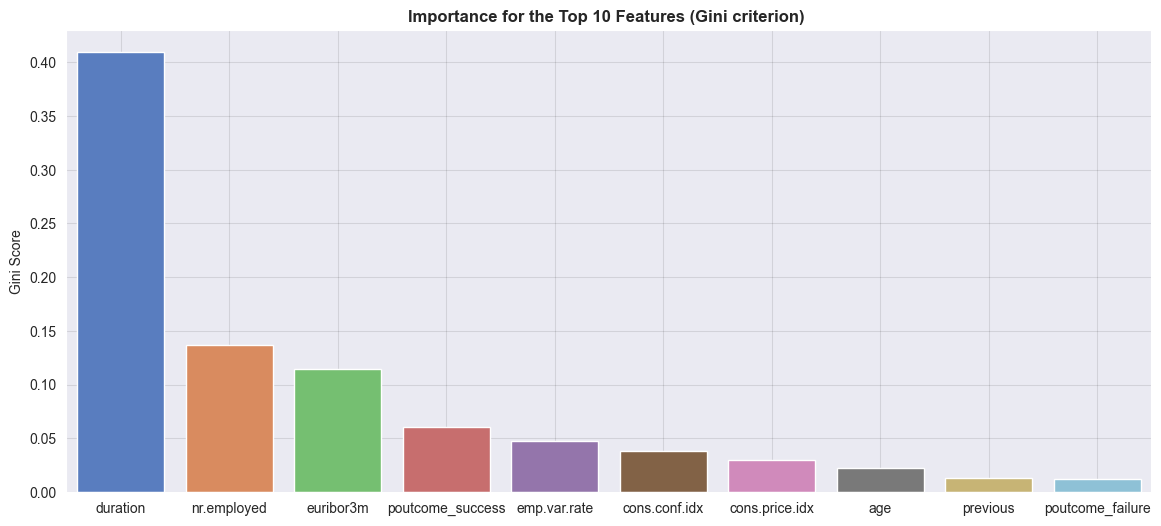

In [43]:
# Plot for feature importance
plt.figure(figsize=(14, 6))
sns.barplot(x=importances.index[0:10],
            y=importances['Gini Score'].iloc[0:10], palette='muted')
plt.title(f'Importance for the Top 10 Features (Gini criterion) ',
          fontweight='bold')
plt.grid(True, alpha=0.1, color='black')
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.09332302, 0.04725115, 0.0406337 , 0.03718798, 0.03554087,
       0.03103803, 0.02888394, 0.02867111, 0.02735718, 0.02703883])

In [46]:
xgbc = xgb.XGBClassifier(learning_rate = 0.01, max_depth = 10, min_child_weight = 2, subsample = 0.5, 
                       colsample_bytree = 0.7, n_estimators = 1000)

In [47]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
xgbc_y_pred = xgbc.predict(X_test)

Confusion matrix:

 [[7154  111]
 [ 811  160]]


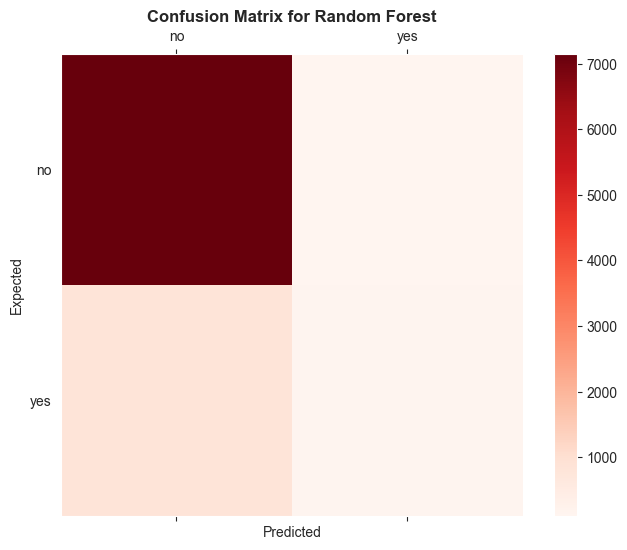

The precision is: 59.04 %
The recall is: 16.48 %


array([[7154,  111],
       [ 811,  160]], dtype=int64)

In [49]:
 #Evaluate the model by using Recall/Precission:
getModelEvaluationMetrics(classifier=xgbc, model_name='Random Forest',x_test=X_test, y_test=y_test,
                              y_predicted=xgbc_y_pred, plot_confusion_matrix=True, figsize=(8,6))

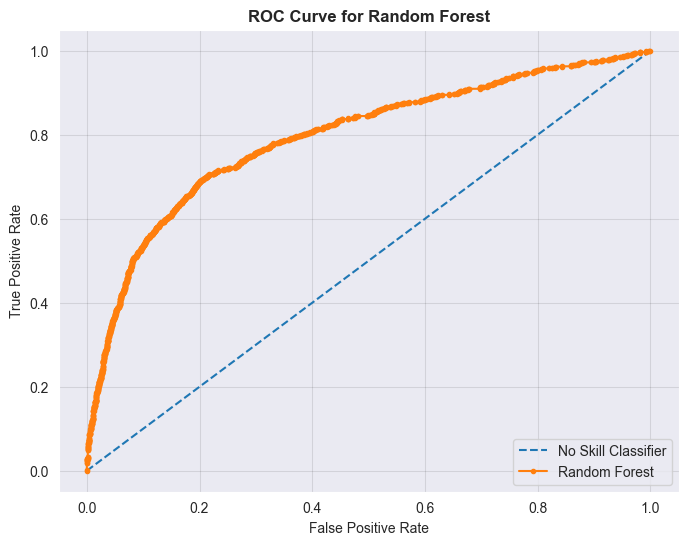

Random Forest - ROC AUC score: 0.7945


0.7945

In [50]:
xgbc_predict_probs = xgbc.predict_proba(X_test)
createROCAnalysis(classifier=xgbc, model_name='Random Forest', y_test=y_test, pred_probs=xgbc_predict_probs,
                  plot_ROC_Curve=True, figsize=(8,6))

#


# Deep Learning

Now We will check Using ANN Technique for incresing our performance of the model 

In [51]:
!pip install tensorflow

In [52]:
#Importing Libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , BatchNormalization
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [53]:
print(X_train.shape , X_test.shape, y_train.shape , y_test.shape )

(32940, 10) (8236, 10) (32940,) (8236,)


In [54]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [55]:
#neural network
model=Sequential()

In [56]:
model.add((Dense(256,activation="relu", input_dim=10)))
model.add(BatchNormalization())

In [57]:
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())

In [58]:
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())

In [59]:
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())

In [60]:
model.add(Dense(1,activation='sigmoid'))

In [61]:
model.compile (optimizer="adam",loss="binary_crossentropy",metrics=["Accuracy"])

In [62]:
train_history=model.fit(X_train,y_train,epochs=20,batch_size=256,callbacks=[early_stopping])

Epoch 1/20
129/129 [==============================] - 19s 39ms/step - loss: 0.4874 - Accuracy: 0.8208
Epoch 2/20
129/129 [==============================] - 4s 34ms/step - loss: 0.3024 - Accuracy: 0.8925
Epoch 3/20
129/129 [==============================] - 5s 37ms/step - loss: 0.2836 - Accuracy: 0.8944
Epoch 4/20
129/129 [==============================] - 7s 55ms/step - loss: 0.2791 - Accuracy: 0.8966
Epoch 5/20
129/129 [==============================] - 6s 46ms/step - loss: 0.2760 - Accuracy: 0.8963
Epoch 6/20
129/129 [==============================] - 7s 58ms/step - loss: 0.2743 - Accuracy: 0.8966
Epoch 7/20
129/129 [==============================] - 6s 43ms/step - loss: 0.2714 - Accuracy: 0.8990
Epoch 8/20
129/129 [==============================] - 8s 58ms/step - loss: 0.2698 - Accuracy: 0.8978
Epoch 9/20
129/129 [==============================] - 5s 40ms/step - loss: 0.2667 - Accuracy: 0.8988
Epoch 10/20
129/129 [==============================] - 4s 33ms/step - loss: 0.2652 - Accur

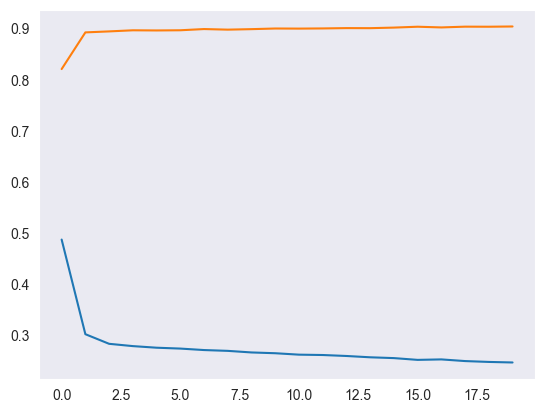

In [63]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['Accuracy'])
plt.show()

In [64]:
model.evaluate(X_test,y_test,batch_size=128)

65/65 [==============================] - 2s 18ms/step - loss: 0.3046 - Accuracy: 0.8856


[0.3045768141746521, 0.8856241106987]

In [65]:
#predictions
y_pred_ann=model.predict(X_test)
y_pred_ann

258/258 [==============================] - 5s 8ms/step


array([[0.10115225],
       [0.15809985],
       [0.75104576],
       ...,
       [0.02455877],
       [0.00945791],
       [0.01761419]], dtype=float32)

In [66]:
y_pred_=np.where(y_pred_ann>=0.5,1,0)
y_pred_

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

Confusion matrix:

 [[7122  143]
 [ 799  172]]


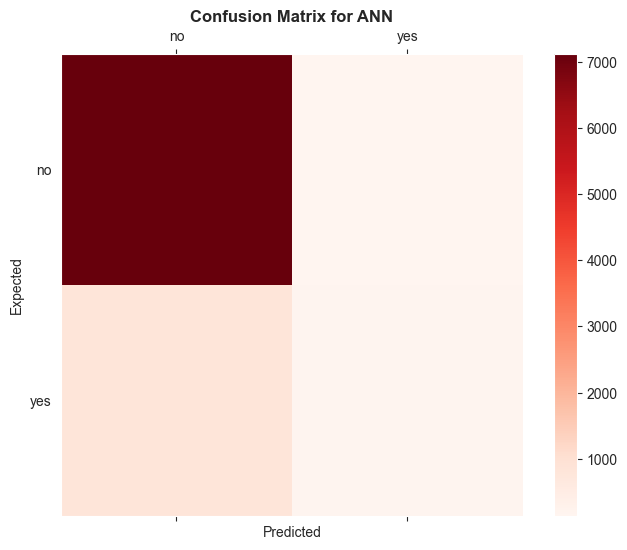

The precision is: 54.6 %
The recall is: 17.71 %


array([[7122,  143],
       [ 799,  172]], dtype=int64)

In [67]:
 #Evaluate the model by using Recall/Precission:
getModelEvaluationMetrics(classifier=model, model_name='ANN',x_test=X_test, y_test=y_test,
                              y_predicted=y_pred_, plot_confusion_matrix=True, figsize=(8,6))

In [68]:
accuracy = accuracy_score(y_test, y_pred_)
print("Accuracy:", accuracy)

Accuracy: 0.8856240893637688


# Hyperparameter Tunning 

In [69]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [70]:
import kerastuner as kt


In [71]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=10))  # Assuming input_dim is 8
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [72]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

Reloading Tuner from .\untitled_project\tuner0.json


In [73]:
tuner.search(X_train , y_train , epochs=5,validation_data=(X_test,y_test))

In [74]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [75]:
model=tuner.get_best_models(num_models=1)[0]

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.fit(X_train ,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
1030/1030 [==============================] - 14s 11ms/step - loss: 0.2991 - accuracy: 0.8922 - val_loss: 0.3057 - val_accuracy: 0.8883
Epoch 8/100
1030/1030 [==============================] - 6s 6ms/step - loss: 0.2911 - accuracy: 0.8940 - val_loss: 0.3025 - val_accuracy: 0.8881
Epoch 9/100
1030/1030 [==============================] - 7s 7ms/step - loss: 0.2895 - accuracy: 0.8938 - val_loss: 0.3021 - val_accuracy: 0.8882
Epoch 10/100
1030/1030 [==============================] - 7s 7ms/step - loss: 0.2883 - accuracy: 0.8943 - val_loss: 0.3028 - val_accuracy: 0.8881
Epoch 11/100
1030/1030 [==============================] - 13s 12ms/step - loss: 0.2878 - accuracy: 0.8939 - val_loss: 0.3020 - val_accuracy: 0.8872
Epoch 12/100
1030/1030 [==============================] - 8s 8ms/step - loss: 0.2870 - accuracy: 0.8953 - val_loss: 0.3025 - val_accuracy: 0.8870
Epoch 13/100
1030/1030 [==============================] - 8s 8ms/step - loss: 0.2865 - accuracy: 0.8951 - val_loss: 0.3029 

1030/1030 [==============================] - 12s 12ms/step - loss: 0.2786 - accuracy: 0.8965 - val_loss: 0.3000 - val_accuracy: 0.8866
Epoch 63/100
1030/1030 [==============================] - 16s 15ms/step - loss: 0.2788 - accuracy: 0.8960 - val_loss: 0.2993 - val_accuracy: 0.8887
Epoch 64/100
1030/1030 [==============================] - 18s 18ms/step - loss: 0.2787 - accuracy: 0.8959 - val_loss: 0.2998 - val_accuracy: 0.8891
Epoch 65/100
1030/1030 [==============================] - 19s 19ms/step - loss: 0.2787 - accuracy: 0.8965 - val_loss: 0.3012 - val_accuracy: 0.8882
Epoch 66/100
1030/1030 [==============================] - 15s 14ms/step - loss: 0.2789 - accuracy: 0.8965 - val_loss: 0.3008 - val_accuracy: 0.8855
Epoch 67/100
1030/1030 [==============================] - 14s 13ms/step - loss: 0.2789 - accuracy: 0.8957 - val_loss: 0.2992 - val_accuracy: 0.8871
Epoch 68/100
1030/1030 [==============================] - 15s 15ms/step - loss: 0.2787 - accuracy: 0.8967 - val_loss: 0.2995 

# Number of neurons 

In [78]:
def build_model(hp):
    model = Sequential()
    units=hp.Int('units',min_value=8,max_value=128,step=8)
    model.add(Dense(units=units,activation='relu',input_dim=10))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [79]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir',project_name='sakshi')

Reloading Tuner from mydir\sakshi\tuner0.json


In [80]:
tuner.search(X_train , y_train , epochs=5,validation_data=(X_test,y_test))

In [81]:
tuner.get_best_hyperparameters()[0].values

{'units': 40}

In [82]:
model=tuner.get_best_models(num_models=1)[0]

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                440       
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
model.fit(X_train ,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
1030/1030 [==============================] - 15s 12ms/step - loss: 0.2954 - accuracy: 0.8925 - val_loss: 0.3048 - val_accuracy: 0.8870
Epoch 8/100
1030/1030 [==============================] - 12s 11ms/step - loss: 0.2910 - accuracy: 0.8940 - val_loss: 0.3024 - val_accuracy: 0.8888
Epoch 9/100
1030/1030 [==============================] - 12s 11ms/step - loss: 0.2892 - accuracy: 0.8938 - val_loss: 0.3026 - val_accuracy: 0.8871
Epoch 10/100
1030/1030 [==============================] - 12s 12ms/step - loss: 0.2880 - accuracy: 0.8947 - val_loss: 0.3014 - val_accuracy: 0.8876
Epoch 11/100
1030/1030 [==============================] - 13s 12ms/step - loss: 0.2872 - accuracy: 0.8947 - val_loss: 0.3032 - val_accuracy: 0.8873
Epoch 12/100
1030/1030 [==============================] - 12s 11ms/step - loss: 0.2865 - accuracy: 0.8944 - val_loss: 0.3011 - val_accuracy: 0.8887
Epoch 13/100
1030/1030 [==============================] - 13s 12ms/step - loss: 0.2861 - accuracy: 0.8951 - val_los

1030/1030 [==============================] - 8s 8ms/step - loss: 0.2758 - accuracy: 0.8974 - val_loss: 0.2959 - val_accuracy: 0.8895
Epoch 81/100
1030/1030 [==============================] - 7s 6ms/step - loss: 0.2758 - accuracy: 0.8972 - val_loss: 0.3030 - val_accuracy: 0.8853
Epoch 82/100
1030/1030 [==============================] - 5s 4ms/step - loss: 0.2759 - accuracy: 0.8979 - val_loss: 0.2964 - val_accuracy: 0.8887
Epoch 83/100
1030/1030 [==============================] - 4s 4ms/step - loss: 0.2750 - accuracy: 0.8975 - val_loss: 0.3008 - val_accuracy: 0.8888
Epoch 84/100
1030/1030 [==============================] - 5s 4ms/step - loss: 0.2760 - accuracy: 0.8977 - val_loss: 0.2980 - val_accuracy: 0.8877
Epoch 85/100
1030/1030 [==============================] - 4s 4ms/step - loss: 0.2755 - accuracy: 0.8970 - val_loss: 0.3008 - val_accuracy: 0.8873
Epoch 86/100
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2759 - accuracy: 0.8964 - val_loss: 0.2979 - val_accuracy

In [85]:
#All in one model 

In [86]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(40,activation='relu',input_dim=10))
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        model.add(Dense(40,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model
    

In [87]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir',project_name='num_layers')

Reloading Tuner from mydir\num_layers\tuner0.json


In [88]:
tuner.search(X_train , y_train , epochs=5,validation_data=(X_test,y_test))

In [89]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 8}

In [90]:
model=tuner.get_best_models(num_models=1)[0]

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                440       
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 40)                1640      
                                                                 
 dense_3 (Dense)             (None, 40)                1640      
                                                                 
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dense_5 (Dense)             (None, 40)                1640      
                                                                 
 dense_6 (Dense)             (None, 40)                1

In [ ]:
model.fit(X_train ,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
1030/1030 [==============================] - 9s 5ms/step - loss: 0.2931 - accuracy: 0.8943 - val_loss: 0.3063 - val_accuracy: 0.8884
Epoch 8/100
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2881 - accuracy: 0.8953 - val_loss: 0.3090 - val_accuracy: 0.8894
Epoch 9/100
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2875 - accuracy: 0.8964 - val_loss: 0.2983 - val_accuracy: 0.8895
Epoch 10/100
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2861 - accuracy: 0.8966 - val_loss: 0.3040 - val_accuracy: 0.8845
Epoch 11/100
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2857 - accuracy: 0.8957 - val_loss: 0.3025 - val_accuracy: 0.8885
Epoch 12/100
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2857 - accuracy: 0.8966 - val_loss: 0.3091 - val_accuracy: 0.8907
Epoch 13/100
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2849 - accuracy: 0.8969 - val_loss: 0.3032 - va

Epoch 63/100
1030/1030 [==============================] - 13s 13ms/step - loss: 0.2914 - accuracy: 0.8930 - val_loss: 0.3644 - val_accuracy: 0.8825
Epoch 64/100
1030/1030 [==============================] - 10s 9ms/step - loss: 0.2933 - accuracy: 0.8941 - val_loss: 0.3163 - val_accuracy: 0.8901
Epoch 65/100
1030/1030 [==============================] - 9s 9ms/step - loss: 0.2945 - accuracy: 0.8922 - val_loss: 0.3350 - val_accuracy: 0.8737
Epoch 66/100
1030/1030 [==============================] - 12s 12ms/step - loss: 0.2919 - accuracy: 0.8948 - val_loss: 0.3093 - val_accuracy: 0.8833
Epoch 67/100
1030/1030 [==============================] - 7s 7ms/step - loss: 0.2934 - accuracy: 0.8932 - val_loss: 0.3810 - val_accuracy: 0.8883
Epoch 68/100
1030/1030 [==============================] - 8s 8ms/step - loss: 0.2963 - accuracy: 0.8926 - val_loss: 0.3511 - val_accuracy: 0.8895
Epoch 69/100
1030/1030 [==============================] - 9s 9ms/step - loss: 0.2924 - accuracy: 0.8925 - val_loss: 0.3

In [ ]:
#predictions
y_pred=model.predict(X_test)
y_pred

In [ ]:
y_pred=np.where(y_pred>=0.5,1,0)
y_pred

In [ ]:
 #Evaluate the model by using Recall/Precission:
getModelEvaluationMetrics(classifier=model, model_name='ANN',x_test=X_test, y_test=y_test,
                              y_predicted=y_pred, plot_confusion_matrix=True, figsize=(8,6))

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)